In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from lgca import get_lgca
from itertools import product
import pickle as pkl
# from numba import jit, prange
from matplotlib.lines import Line2D
from plot_funcs import label_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import product
import pickle as pkl

PARAMPATH = '.\\data\\gog\\nonlocaldensity_10reps\\'
PATH = '.\\data\\gog\\nonlocaldensity_recurrence\\'
parameters = np.load(PARAMPATH+'params.npz', allow_pickle=True)

constparams = parameters['constparams'].item()
r_ds = parameters['r_ds']
thetas = parameters['thetas']
reps = 10
# data = np.load(PATH+'n_pr.npy', allow_pickle=True)

In [2]:
kappas_r_t = [[[] for _ in range(len(thetas))] for _ in range(len(r_ds))]
resting_cells_r_t = np.zeros((len(r_ds), len(thetas), reps), dtype=int)
total_cells_r_t = np.zeros_like(resting_cells_r_t)
migrating_cells_r_t = np.zeros_like(resting_cells_r_t)
for index in product(np.arange(0, len(r_ds)), np.arange(0, len(thetas))):
    for i in range(reps):
        with open(PATH+'data{}.pkl'.format(index+(i, 0,)), 'rb') as f:
            d = pkl.load(f)
        kappas_r_t[index[0]][index[1]].append(list(d['kappa'][d['nodes_t'].sum()]))
        resting_cells_r_t[index[0], index[1], i] = len(d['nodes_t'][..., -1].sum())
        total_cells_r_t[index[0], index[1], i] = len(d['nodes_t'].sum())

migrating_cells_r_t = total_cells_r_t - resting_cells_r_t

In [3]:
resting_fraction_r_t = resting_cells_r_t / total_cells_r_t
migration_fraction_r_t = migrating_cells_r_t / total_cells_r_t

C:\Users\Simon Syga\AppData\Local\Temp\ipykernel_3776\3526654923.py:1: RuntimeWarning: invalid value encountered in divide
  resting_fraction_r_t = resting_cells_r_t / total_cells_r_t
C:\Users\Simon Syga\AppData\Local\Temp\ipykernel_3776\3526654923.py:2: RuntimeWarning: invalid value encountered in divide
  migration_fraction_r_t = migrating_cells_r_t / total_cells_r_t


In [4]:
phenotype_entropy = - resting_fraction_r_t * np.log2(resting_fraction_r_t) - migration_fraction_r_t * np.log2(migration_fraction_r_t)
mean_phenotype_entropy = phenotype_entropy.mean(axis=-1)

In [5]:
dtheta = (thetas[1] - thetas[0]) / 2
dr_ds = (r_ds[1] - r_ds[0]) / 2
extent = [thetas[0]-dtheta, thetas[-1]+dtheta, r_ds[0]-dr_ds, r_ds[-1]+dr_ds]

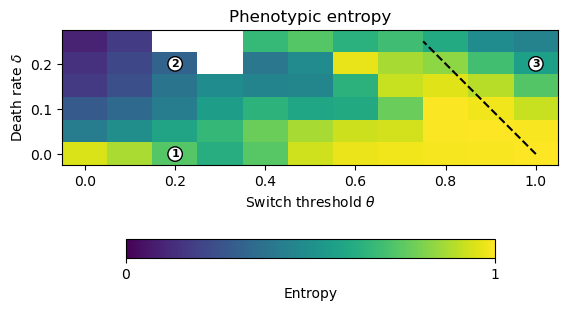

In [6]:
bbox_attr = dict(boxstyle='circle,pad=0.2', edgecolor='black', facecolor='white', linewidth=1)
plt.imshow(mean_phenotype_entropy, aspect='equal', vmin=0, vmax=1, extent=extent, origin='lower')
plt.colorbar(label=r'Entropy', pad=0.2, fraction=0.05, orientation='horizontal', ticks=[0, 1])
plt.xlabel(r'Switch threshold $\theta$')
plt.ylabel(r'Death rate $\delta$')
plt.text(0.2, 0., '1', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
        ha='center',
        va='center',
         )
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
plt.title('Phenotypic entropy')
plt.show()

In [7]:
def estimate_entropy(data):
    # Compute histogram of data using numpy's automatic bin selection
    hist, bin_edges = np.histogram(data, bins='auto', density=True)

    # Calculate bin widths
    bin_width = bin_edges[1] - bin_edges[0]
    print(hist.sum() * bin_width)

    # Create a masked array to handle zero probabilities
    probabilities = np.ma.masked_equal(hist, 0)

    # Compute the entropy
    entropy = -np.ma.sum(probabilities * np.ma.log2(probabilities) * bin_width)

    return entropy

In [8]:
# @jit(nopython=True, parallel=True, fastmath=True, nogil=True)
# def raos_quadratic_entropy(kappa):
#     rqe = 0.
#     N = len(kappa)
#     for i in prange(N-1):
#         for j in prange(i+1, N):
#             rqe += abs(kappa[i] - kappa[j])
#     rqe /= N**2
#     return rqe

In [9]:
genetic_entropy = [[[[estimate_entropy(kappas_r_t[i][j][k])] for k in range(reps)] for j in range(len(thetas))] for i in range(len(r_ds))]

1.0000000000000053
0.9999999999999932
0.9999999999999986
1.0000000000000007
1.000000000000004
1.0000000000000049
0.9999999999999933
1.0000000000000073
0.9999999999999964
1.0000000000000044
1.0000000000000075
0.9999999999999943
0.9999999999999963
1.0000000000000027
0.9999999999999983
1.0000000000000009
0.999999999999996
0.9999999999999946
0.9999999999999987
1.0000000000000036
0.9999999999999997
0.9999999999999968
0.9999999999999954
0.9999999999999941
0.9999999999999967
1.0000000000000013
0.9999999999999954
0.9999999999999968
0.9999999999999925
0.9999999999999974
1.000000000000001
1.0000000000000042
1.0000000000000007
1.0000000000000036
0.9999999999999956
0.9999999999999991
0.9999999999999978
0.9999999999999944
0.9999999999999951
1.0000000000000033
0.9999999999999961
0.9999999999999968
0.9999999999999973
0.9999999999999988
0.9999999999999994
1.0000000000000007
0.9999999999999963
1.0000000000000024
1.0000000000000029
0.999999999999993
1.0000000000000024
0.9999999999999966
0.99999999999999

C:\ProgramData\anaconda3\envs\py312\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


1.0000000000000067
1.000000000000003
1.000000000000001
1.0000000000000033
1.0000000000000038
1.0000000000000013
1.000000000000003
0.9999999999999983
0.9999999999999947
0.9999999999999944
0.9999999999999987
1.0000000000000049
1.0000000000000053
0.999999999999993
1.0000000000000009
0.9999999999999997
0.9999999999999992
1.0000000000000033
1.00000000000001
1.0000000000000093
0.9999999999999999
0.9999999999999966
0.9999999999999993
0.9999999999999959
1.0000000000000089
1.0000000000000084
1.0000000000000069
0.999999999999998
1.000000000000003
1.0000000000000058
1.0000000000000022
0.999999999999999
0.9999999999999963
0.9999999999999963
1.000000000000004
0.9999999999999979
0.9999999999999962
0.9999999999999923
1.0
0.9999999999999997
1.0
0.9999999999999998
1.000000000000001
0.9999999999999999
1.0
0.9999999999999993
0.9999999999999999
1.0000000000000002
1.0000000000000002
0.9999999999999998
1.000000000000001
1.000000000000008
1.0000000000000018
0.9999999999999994
0.9999999999999996
1.0
0.9999999

In [10]:
# quadratic_entropy = [[[[raos_quadratic_entropy(kappas_r_t[i][j][k])] for k in range(reps)] for j in range(len(thetas))] for i in range(len(r_ds))]

In [10]:
# index = -2, -1, 0
# plt.title(r'$\delta = {}, \theta = {}$'.format(r_ds[index[0]], thetas[index[1]]))
# plt.hist(kappas_r_t[-2][-1][0])

In [11]:
# quadratic_entropy = np.array(quadratic_entropy).mean(-1)
# mean_quadratic_entropy = quadratic_entropy.mean(axis=-1)

In [10]:
genetic_entropy = np.array(genetic_entropy).mean(-1)
mean_genetic_entropy = genetic_entropy.mean(axis=-1)

C:\Users\Simon Syga\AppData\Local\Temp\ipykernel_3776\567070488.py:1: UserWarning: Warning: converting a masked element to nan.
  genetic_entropy = np.array(genetic_entropy).mean(-1)


In [11]:
# plt.style.use('default')
# plt.style.use('thesis_style.mplstyle')
plt.style.use('nature_style.mplstyle')
# plt.style.use('')

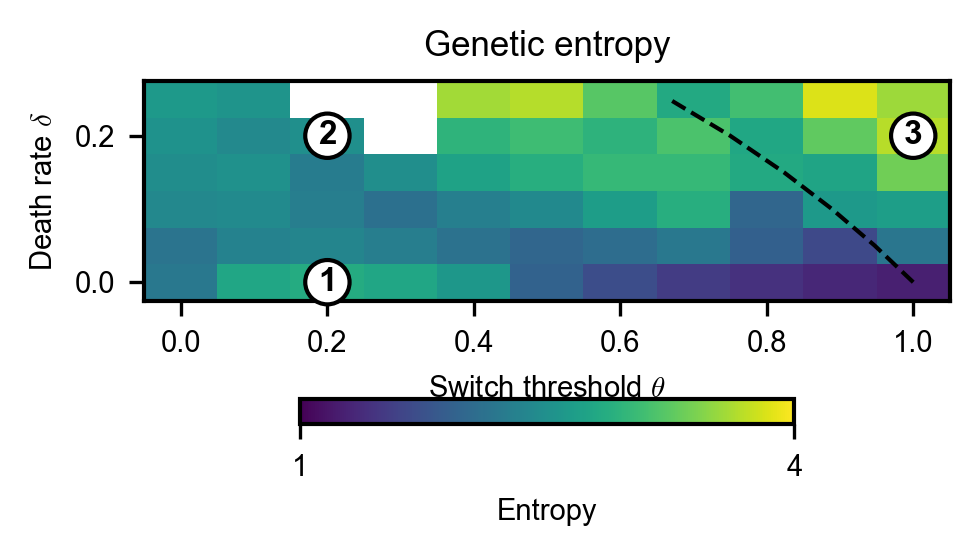

In [12]:
plt.imshow(mean_genetic_entropy, aspect='equal', extent=extent, origin='lower', vmin=1, vmax=4, cmap='viridis')
plt.colorbar(label=r'Entropy', pad=0.2, fraction=0.05, orientation='horizontal', ticks=[1, 4])
plt.xlabel(r'Switch threshold $\theta$')
plt.ylabel(r'Death rate $\delta$')
plt.text(0.2, 0., '1', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
        ha='center',
        va='center',
         )
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] / (1 - np.array(r_ds)[:, np.newaxis]) - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
plt.title('Genetic entropy')
plt.show()

In [15]:
# plt.imshow(mean_quadratic_entropy, aspect='equal', extent=extent, origin='lower', cmap='viridis')
# plt.colorbar(label=r'Quadratic entropy', pad=0.2, fraction=0.05, orientation='horizontal')
# plt.xlabel(r'Switch threshold $\theta$')
# plt.ylabel(r'Death rate $\delta$')
# plt.text(0.2, 0., '1', fontsize=8, weight='bold',
#         ha='center',
#         va='center',
#         bbox=bbox_attr
#          )
# plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
#         ha='center',
#         va='center',
#         bbox=bbox_attr
#          )
# plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
#         ha='center',
#         va='center',
#          )
# contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
# plt.title('Quadratic entropy')
# plt.show()

In [16]:
# from scipy.stats import skew, kurtosis
# from sklearn.mixture import GaussianMixture

In [17]:
# calculate bimodality coefficent
# calculate skewness
# def bc(x):
#     sk = skew(x)
#     k = kurtosis(x, fisher=False)
#     n = len(x)
#     return (sk**2 + 1) / (k + 3 * ((n - 1)**2 / ((n - 2) * (n - 3))))

In [18]:
# def aic_diff(x):
#     f1 = GaussianMixture(n_components=1).fit(x[:, np.newaxis])
#     f2 = GaussianMixture(n_components=2).fit(x[:, np.newaxis])
#     aic1 = f1.aic(x[:, np.newaxis])
#     aic2 = f2.aic(x[:, np.newaxis])
#     return (aic1 - aic2) / max(aic1, aic2)

In [19]:
# kurt = np.array([[kurtosis(np.array(kappas_r_t[i][j]), fisher=False, bias=False) for j in range(len(thetas))] for i in range(len(r_ds))])

In [20]:
# bcs = np.array([[bc(np.array(kappas_r_t[i][j])) for j in range(len(thetas))] for i in range(len(r_ds))])

In [21]:
# aic = np.array([[aic_diff(np.array(kappas_r_t[i][j])) for j in range(len(thetas))] for i in range(len(r_ds))])

In [14]:
# med = np.array([[np.median(np.array(kappas_r_t[i][j])) for j in range(len(thetas))] for i in range(len(r_ds))])
kappas_r_t_temp = [[[] for j in range(len(thetas))] for i in range(len(r_ds))]
for i in range(len(r_ds)):
    for j in range(len(thetas)):
        for k in range(reps):
            kappas_r_t_temp[i][j].extend(kappas_r_t[i][j][k])
meankappa = np.array([[np.mean(np.array(kappas_r_t_temp[i][j])) for j in range(len(thetas))] for i in range(len(r_ds))])

In [23]:
# skewness = np.array([[skew(np.array(kappas_r_t[i][j]), bias=False) for j in range(len(thetas))] for i in range(len(r_ds))])

In [24]:
# plt.imshow(skewness, cmap='coolwarm', aspect='equal', vmax=2, vmin=-2)
# plt.colorbar()
# plt.show()

In [25]:
# plt.imshow(pvals, cmap='gray', aspect='equal')
# plt.colorbar()

In [26]:
# plt.imshow(bcs, cmap='gray', aspect='equal')
# plt.colorbar()

In [27]:
# plt.imshow(aic, cmap='coolwarm', aspect='equal')
# plt.colorbar()

In [28]:
# plt.imshow(aic> 0, cmap='gray', aspect='equal')
# plt.colorbar()

In [29]:
# # Create a figure using the style
# fig, ax = plt.subplots()
# # Get the current figure size
# fig_width, fig_height = fig.get_size_inches()
#
# bbox_attr = dict(boxstyle='circle,pad=0.2', edgecolor='black', facecolor='white', linewidth=1)
#
# # Set the new figure size by multiplying it by the scale factor
# scale_factor = 0.7
# fig.set_size_inches(fig_width * scale_factor, fig_height)
# plt.imshow(med, cmap='coolwarm', aspect='equal', extent=extent, vmin=-5, vmax=5, interpolation='none', origin='lower')
# # place colorbar at bottom of image
# plt.colorbar(label=r'Switch parameter ${\kappa}$', pad=0.2, fraction=0.05, orientation='horizontal')
# plt.xlabel(r'Switch threshold $\theta$')
# plt.ylabel(r'Death rate $\delta$')
# plt.text(0.2, 0., '1', fontsize=8, weight='bold',
#         ha='center',
#         va='center',
#         bbox=bbox_attr
#          )
# plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
#         ha='center',
#         va='center',
#         bbox=bbox_attr
#          )
# plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
#         ha='center',
#         va='center',
#          )
# contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
# # custom_line = Line2D([0], [0], color='k', linestyle='dashed', label=r'$\rho_{\mathcal{N}}^{\max} - \theta = 0$')
# custom_line = Line2D([0], [0], color='k', linestyle='dashed', label='Prediction')
# plt.legend(handles=[custom_line], loc='lower right', bbox_to_anchor=(1, 1))
# # plt.savefig('evolutionary_regimes.svg', bbox_inches='tight')
# # plt.savefig('evolutionary_regimes.pdf', bbox_inches='tight')

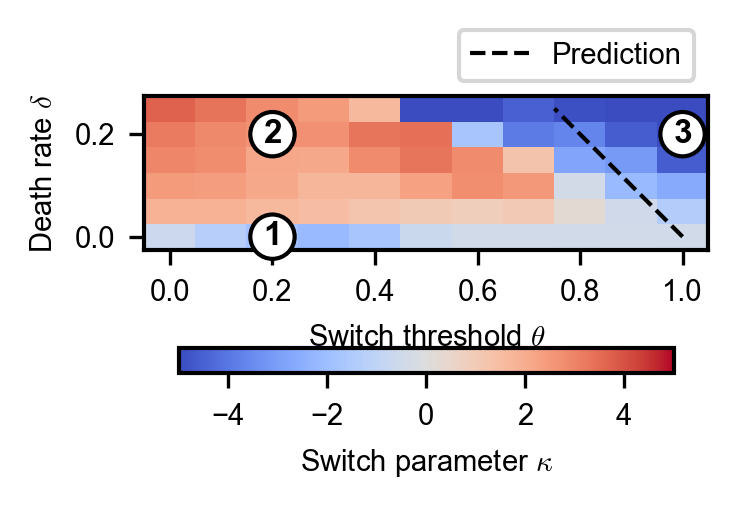

In [17]:
# Create a figure using the style
fig, ax = plt.subplots()
# Get the current figure size
fig_width, fig_height = fig.get_size_inches()

bbox_attr = dict(boxstyle='circle,pad=0.2', edgecolor='black', facecolor='white', linewidth=1)

# Set the new figure size by multiplying it by the scale factor
scale_factor = 0.7
fig.set_size_inches(fig_width * scale_factor, fig_height)
plt.imshow(meankappa, cmap='coolwarm', aspect='equal', extent=extent, vmin=-5, vmax=5, interpolation='none', origin='lower')
# place colorbar at bottom of image
plt.colorbar(label=r'Switch parameter ${\kappa}$', pad=0.2, fraction=0.05, orientation='horizontal')
plt.xlabel(r'Switch threshold $\theta$')
plt.ylabel(r'Death rate $\delta$')
plt.text(0.2, 0., '1', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
        ha='center',
        va='center',
         )
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
# contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] / (1 - np.array(r_ds)[:, np.newaxis]) - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
# custom_line = Line2D([0], [0], color='k', linestyle='dashed', label=r'$\rho_{\mathcal{N}}^{\max} - \theta = 0$')
custom_line = Line2D([0], [0], color='k', linestyle='dashed', label='Prediction')
plt.legend(handles=[custom_line], loc='lower right', bbox_to_anchor=(1, 1))
# plt.savefig('evolutionary_regimes.svg', bbox_inches='tight')
# plt.savefig('evolutionary_regimes.pdf', bbox_inches='tight')

In [20]:
PATH = '.\\data\\gog\\nonlocaldensity_10reps\\'
parameters = np.load(PATH + 'params.npz', allow_pickle=True)
PATH = '.\\data\\gog\\nonlocaldensity_recurrence\\'
constparams = parameters['constparams'].item()
r_ds = parameters['r_ds']
thetas = parameters['thetas']
reps = 10
dtheta = (thetas[1] - thetas[0]) / 2
dr_ds = (r_ds[1] - r_ds[0]) / 2
rec_time = np.zeros((len(r_ds), len(thetas), reps), dtype=int)
rec_time = np.ma.array(rec_time, mask=True)
for index in product(np.arange(0, len(r_ds)), np.arange(0, len(thetas))):
    for i in range(reps):
        with open(PATH + 'data{}.pkl'.format(index + (i, 0,)), 'rb') as f:
            d = pkl.load(f)
        rec_time[index + (i,)] = d['tmax']
        rec_time.mask[index + (i,)] = False if d['n_it'] > 0 else True

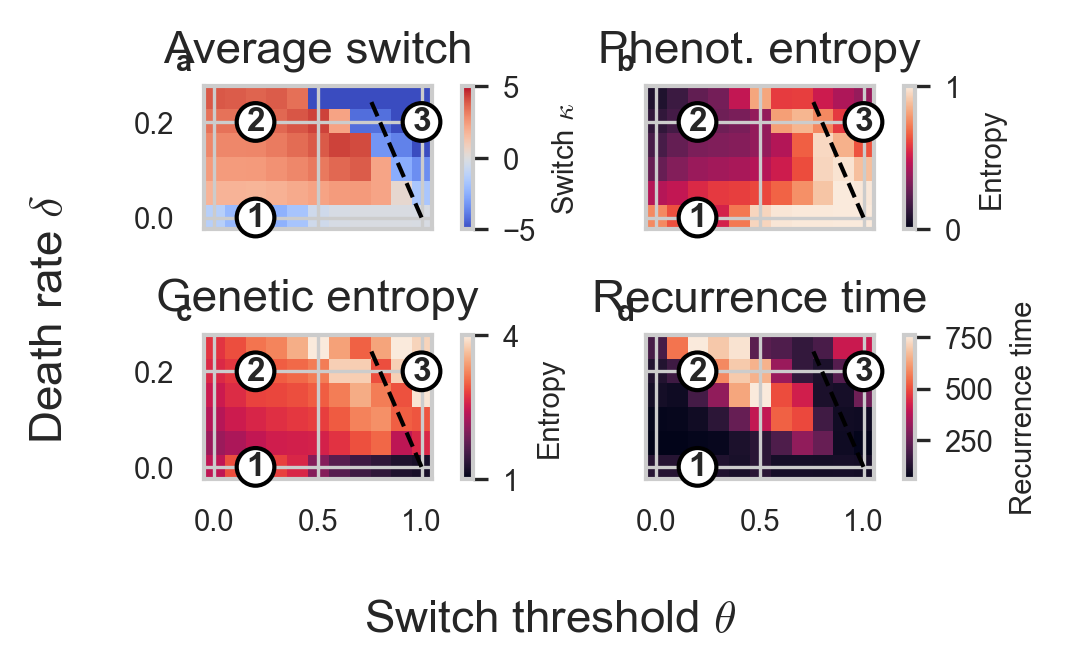

In [22]:
# create a figure with 4 subplots
wi, le = plt.rcParams['figure.figsize']
golden_ratio = (np.sqrt(5) + 1.0) / 2.0
le = wi / golden_ratio
figsize = wi, le

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=figsize, tight_layout=True)
# Get the current figure size
# fig_width, fig_height = fig.get_size_inches()
# # fig_height *= 1.5
# fig.set_size_inches(fig_width, fig_height)
bbox_attr = dict(boxstyle='circle,pad=0.1', edgecolor='black', facecolor='white', linewidth=1)
aspect = 'auto'
plt.sca(ax[0, 0])
# plt.xlabel(r'Switch threshold $\theta$')
# plt.ylabel(r'Death rate $\delta$')
plt.imshow(meankappa, cmap='coolwarm', aspect=aspect, extent=extent, vmin=-5, vmax=5, interpolation='none', origin='lower')
# insert color bar to the right of image with the same height
divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(label=r'Switch ${\kappa}$', pad=0.2, fraction=0.05, use_gridspec=True, cax=cax)
# plt.colorbar(label=r'Switch parameter ${\kappa}$', pad=0.2, fraction=0.05, orientation='vertical')
# plt.xlabel(r'Switch threshold $\theta$')
# plt.ylabel(r'Death rate $\delta$')
plt.sca(ax[0, 0])

plt.text(0.2, 0., '1', fontsize=8, weight='bold',usetex=False,
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',usetex=False,
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,usetex=False,
        ha='center',
        va='center',
         )
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
# custom_line = Line2D([0], [0], color='k', linestyle='dashed', label=r'$\rho_{\mathcal{N}}^{\max} - \theta = 0$')
# custom_line = Line2D([0], [0], color='k', linestyle='dashed', label='Prediction')
# plt.legend(handles=[custom_line], loc='lower right', bbox_to_anchor=(1, 1))
plt.title('Average switch', fontsize=11)

plt.sca(ax[0, 1])
plt.imshow(mean_phenotype_entropy, aspect=aspect, vmin=0, vmax=1, extent=extent, origin='lower')
divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(label=r'Entropy', pad=0.2, fraction=0.05, orientation='vertical', ticks=[0, 1], cax=cax, use_gridspec=True)
plt.sca(ax[0, 1])
plt.text(0.2, 0., '1', fontsize=8, weight='bold',usetex=False,
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',usetex=False,
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,usetex=False,
        ha='center',
        va='center',
         )
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
plt.title('Phenot. entropy', fontsize=11)

plt.sca(ax[1, 0])
plt.imshow(mean_genetic_entropy, aspect=aspect, extent=extent, origin='lower', vmin=1, vmax=4)
divider = make_axes_locatable(ax[1, 0])
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(label=r'Entropy', pad=0.2, fraction=0.05, ticks=[1, 4], cax=cax, use_gridspec=True)
plt.sca(ax[1, 0])
plt.text(0.2, 0., '1', fontsize=8, weight='bold', usetex=False,
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold', usetex=False,
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,
        ha='center',
        va='center',
         usetex=False,
         )
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
plt.title('Genetic entropy', fontsize=11)
# plt.ylabel(r'Death rate $\delta$')

plt.sca(ax[-1, -1])
plt.imshow(rec_time.mean(-1), aspect=aspect, extent=extent, origin='lower')
plt.text(0.2, 0., '1', fontsize=8, weight='bold',usetex=False,
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(0.2, 0.2, '2', fontsize=8, weight='bold',usetex=False,
        ha='center',
        va='center',
        bbox=bbox_attr
         )
plt.text(1., 0.2, '3', fontsize=8, weight='bold', bbox=bbox_attr,usetex=False,
        ha='center',
        va='center',
         )
divider = make_axes_locatable(ax[1,1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(label=r'Recurrence time', pad=0.2, fraction=0.05, orientation='vertical', use_gridspec=True, cax=cax)
# cbar.set_ticks([0, 750])#
# cbar.set_ticklabels([0, 1])
plt.sca(ax[-1, -1])
contour = plt.contour(thetas, r_ds, 1 - np.array(r_ds)[:, np.newaxis] - np.array(thetas)[np.newaxis, :], levels=[0], colors='k', linestyles='dashed', extent=extent, origin='lower')
plt.ylim(-dr_ds, r_ds[-1]+dr_ds)
plt.title('Recurrence time', fontsize=11)
plt.xticks([0, 0.5, 1])
fig.supxlabel(r'Switch threshold $\theta$', fontsize=11, y=0.0)
fig.supylabel(r'Death rate $\delta$', fontsize=11, x=0.0)
# label_axes(fig, labels=['A', 'B', 'C', 'D', '', '', '', ''])
label_axes(ax.flat, labels=['a', 'b', 'c', 'd', '', '', '', ''], usetex=False, loc=(-0.05, 1.11))

fig.tight_layout()
# plt.savefig('heterogeneity_treatment_thesis.pdf', bbox_inches='tight')
# plt.savefig('heterogeneity_treatment.svg', bbox_inches='tight')

# Save everthing as a dataframe

In [ ]:
import pandas as pd

In [ ]:
kappas_r_t_df = np.zeros((len(r_ds), len(thetas), reps))
for i in range(len(r_ds)):
    for j in range(len(thetas)):
        for k in range(reps):
            kappas_r_t_df[i, j, k] = np.mean(kappas_r_t[i][j][k])

In [ ]:
# kappas_r_t, genetic_entropy, phenotype_entropy, rec_time, r_ds, thetas

In [ ]:
x, y, z = kappas_r_t_df.shape

In [ ]:
combinations = x * y
total_repetitions = combinations * z

In [ ]:
expanded_r_ds = np.repeat(r_ds, y).repeat(z)
expanded_thetas = np.tile(thetas, x).repeat(z)


In [ ]:
params_df = pd.DataFrame({
    'r_d': expanded_r_ds,
    'theta': expanded_thetas,
    'repetition': np.tile(np.arange(z), combinations)
}, index=np.arange(total_repetitions))

In [ ]:
kappas_flat = kappas_r_t_df.flatten()
genetic_entropy_flat = genetic_entropy.flatten()
phenotype_entropy_flat = phenotype_entropy.flatten()
rectime_flat = rec_time.flatten()

kappas_df = pd.DataFrame({'kappa': kappas_flat}, index=np.arange(total_repetitions))
genetic_entropy_df = pd.DataFrame({'genetic_entropy': genetic_entropy_flat}, index=np.arange(total_repetitions))
phenotype_entropy_df = pd.DataFrame({'phenotype_entropy': phenotype_entropy_flat}, index=np.arange(total_repetitions))
rectime_df = pd.DataFrame({'rectime': rectime_flat}, index=np.arange(total_repetitions))

In [ ]:
df = pd.concat([params_df, kappas_df, genetic_entropy_df, phenotype_entropy_df, rectime_df], axis=1)

In [ ]:
df.head()

In [ ]:
# df.to_csv('treatment.csv', index=False)  # save df to csv